In [1]:
#import 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from matplotlib.offsetbox import AnchoredText
init_notebook_mode(connected=True)
from IPython.display import Markdown as md

In [2]:
# Import and Checking Data

In [3]:
#get dataset
df = pd.read_csv('Dataset.csv', encoding = 'utf-8')

In [4]:
# df.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 392105 entries, 0 to 392104
# Data columns (total 8 columns):
#  #   Column                                       Non-Null Count   Dtype 
# ---  ------                                       --------------   ----- 
#  0   Order Id                                     392105 non-null  int64 
#  1   Product categorie                            392105 non-null  object
#  2   Product subcategorie                         391264 non-null  object
#  3   Product reference                            392105 non-null  int64 
#  4   Product quantity                             392105 non-null  int64 
#  5   Total price (unit price x product quantity)  392105 non-null  object
#  6   Supplier country                             392105 non-null  object
#  7   Supplier ID                                  392105 non-null  int64 
# dtypes: int64(4), object(4)
# memory usage: 23.9+ MB

# The column "Total price (unit price x product quantity)" should be float64 instead of object (string), we have to convert it.

In [5]:
try:
    df['Total price (unit price x product quantity)'] = df['Total price (unit price x product quantity)'].astype(float)
except ValueError as err:
#     print("There is an error : ",err)
    pass
    
# There is an error :  could not convert string to float: '1 140.48'
# Converting this 'number' failed because of the gap between thousands and hundreds. All gap must be deleted

try:
    df['Total price (unit price x product quantity)'] = df['Total price (unit price x product quantity)'].apply(lambda x: float(x.split()[0].replace(' ', '')))
    df['Total price (unit price x product quantity)'] = df['Total price (unit price x product quantity)'].astype(float)
except ValueError as err:
    print(err)

#Get a simple view of the dataset
# df

,Order Id,Product categorie,Product subcategorie,Product reference,Product quantity,Total price (unit price x product quantity),Supplier country,Supplier ID
0,61865,Spirits,Anise,483222,2,14.90,Spain,1
1,62447,Wine,Rosé,822222,12,64.20,Spain,1
2,64401,Spirits,Herbal liquor,434732,1,13.15,Spain,2
3,64588,Wine,red,600772,30,172.50,Spain,3
4,64674,Spirits,Tequila,857357,1,36.70,Spain,1
...,...,...,...,...,...,...,...,...
392100,345866,Spirits,Whiskey,1148070,1,204.95,Spain,92
392101,345866,Spirits,Whiskey,1266684,1,187.25,Spain,92
392102,345866,Spirits,Vermouth,535065,1,8.18,Spain,92
392103,345867,Spirits,Vodka,436899,1,12.77,Spain,86


In [6]:
# df.describe()

,Order Id,Product reference,Product quantity,Total price (unit price x product quantity),Supplier ID
count,392105.000000,3.921050e+05,392105.000000,392105.000000,392105.000000
mean,206362.621048,7.745483e+05,5.406034,69.142458,71.792961
std,79428.420626,3.062226e+05,8.781861,87.661182,62.018536
min,61865.000000,4.300000e+01,1.000000,0.010000,1.000000
25%,138464.000000,4.457420e+05,1.000000,19.400000,6.000000
50%,206161.000000,8.075040e+05,3.000000,40.450000,86.000000
75%,274664.000000,1.064266e+06,6.000000,84.600000,124.000000
max,345868.000000,1.336152e+06,1440.000000,999.800000,265.000000


In [7]:
# Check dataset

# Check for null value
# df.isnull().sum()

# Order Id                                         0
# Product categorie                                0
# Product subcategorie                           841
# Product reference                                0
# Product quantity                                 0
# Total price (unit price x product quantity)      0
# Supplier country                                 0
# Supplier ID                                      0
# dtype: int64

# There are null values in only one column : Product subcategorie 
# Is it a problem ?
# Let's see which Product categories have no subcategory :

# print(df[df.isnull().any(axis=1)]['Product categorie'].unique())
# ['Beer']

# There is only one single Product category having no subcategory : Beer
# It has no impact on our dataset.

# The dataset contains many categorical columns
# They have to be checked for spelling

In [8]:
# for col in list(df.select_dtypes(['object']).columns):
#   print(df[col].sort_values().unique())

# ['Accessories' 'Beer' 'Christmas gifts' 'Gourmet' 'Lots and gifts'
#  'Spirits' 'Wine']
# ['Abbey' 'Absinthe' 'Absinthe service accessories' 'Accessories'
#  'Aerators & oxygenators' 'Aguardiente' 'Alcohol-free' 'Ale' 'Algae'
#  'Altbier' 'Amaretto' 'AmbrÃ©e beer' 'American Pale Ale' 'Anise'
#  'Appetizers' 'Armagnac' 'Aroma kits' 'Bakery' 'Barley wine'
#  'Belgian Strong Pale Ale' 'Bio' 'Bitter' 'Black IPA' 'Black beer'
#  'Blond Ale' 'Bock' 'Books' 'Bottle racks' 'Bourbon' 'Brandy' 'Brown Ale'
#  'CachaÃ§a' 'Calvados' 'Caviar' 'Champagne' 'Cheese' 'Chocolate'
#  'Christmas' 'Christmas Gift Baskets' 'Christmas Gifts'
#  'Christmas Gourmet Selection' 'Christmas baskets' 'Cider'
#  'Cocktail service accessories' 'Cocottes and fondues' 'Coffee'
#  'Coffee liquor' 'Coffeemakers and teapots' 'Cognac' 'Condiments'
#  'Coolers' 'Corkscrews' 'Craft' 'Decanters' 'Deli' 'Desserts & Sweets'
#  'Dortmunder' 'Dried fruits' 'Dubbel' 'Export' 'Flask' 'Frangelico'
#  'Fruit' 'Fruit liquor' 'Fruits' 'Gift boxes' 'Gift packs' 'Gifts' 'Gin'
#  'Glasses' 'Golden beer' 'Gourmet' 'Grappa' 'Gueuze' 'Ham holder' 'Hams'
#  'Hefeweizen' 'Herbal liquor' 'Herbs and spices' 'Honey' 'Household'
#  'Imperial Stout' 'Indian Pale Ale' 'Irish Ale' 'Jams' 'Juices'
#  'Kellerbier' 'Kriek' 'KÃ¶lsch' 'Lager' 'Lambic' 'Legumes and vegetables'
#  'Limoncello' 'Liquors & creams' 'Lots and gifts' 'Marc' 'Marc cream'
#  'Mezcal' 'Miniatures' 'Mushrooms' 'MÃ¤rzenbier' 'Nougat' 'Oils' 'Old Ale'
#  'Olive oil' 'PacharÃ¡n' 'Pasta' 'Pastis' 'Pastries and cakes' 'Pates'
#  'Pickles' 'Pilsener' 'Pisco' 'Plugs & vacuum pumps' 'Porter' 'Preserves'
#  'Quadrupel' 'Ratafia' 'Ready Meals' 'Red Ale' 'Rice' 'Rosé' 'Rum'
#  'Rye beer' 'Saison' 'Sake' 'Salt' 'Sambuca' 'Sangria'
#  'Sauces and mustards' 'Sausages' 'Scottish Ale' 'Sliced' 'Smoked'
#  'Soft drinks and Mixers' 'Soups and creams' 'Special' 'Spirits' 'Stout'
#  'Strong Ale' 'Sugar' 'Syrup' 'Tea and infusions' 'Tequila' 'Textures'
#  'Thermometers' 'Tonic' 'Trappist' 'Triple Sec' 'Vermouth' 'Vinegars'
#  'Vodka' 'Water' 'Wheat' 'Whiskey' 'Whiskey Cream' 'Wine boxes'
#  'Wine cellars' 'Wine service accessories' 'Wines to offer' 'Winter Ale'
#  'de Garde' 'fortified' 'ice buckets' 'red' 'sparkling' 'sweet' 'white'
#  nan]
# ['Belgium' 'France' 'Germany' 'Greece' 'Italy' 'Luxembourg' 'Netherlands'
#  'Portugal' 'Serbia' 'Spain' 'United Kingdom']

# Different writings do not overlap
# The dataset can be used as it

# Analysis

## Sales

Here are some indicators from the raw dataset.
As a reminder: the average order value is equal to $\Large\frac{total  sales}{total N. Order}$

In [9]:
income = df['Total price (unit price x product quantity)'].sum()
n_order = len(df['Order Id'].unique())
avg_order_value = income/n_order

fig = go.FigureWidget()

font_size = 65

fig.add_trace(go.Indicator(
    mode = "number",
    value = income,
    number_font_size = font_size,
    title = {"text": "Total Sales"},
    domain = {'x': [0, 1/3], 'y': [0, 1]},))

fig.add_trace(go.Indicator(
    mode = "number",
    value = n_order,
    number_font_size = font_size,
    title = {"text": "Total N. Order"},
    domain = {'x': [1/3, 2/3], 'y': [0, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = avg_order_value,
    number_font_size = font_size,
    title = {"text": "Average Order Value"},
    domain = {'x': [2/3, 1], 'y': [0, 1]}))

fig.update_layout(
    autosize=False,
    width=1000,
    height=150,
)

fig.show()

The violin plot is showing the distribution of order values. As we can see, the majority of orders are concentrated between 0 and 150 in value (boxplot). And more particularly, the highest orders can be considered outlier in the statistical model (3 times std value)

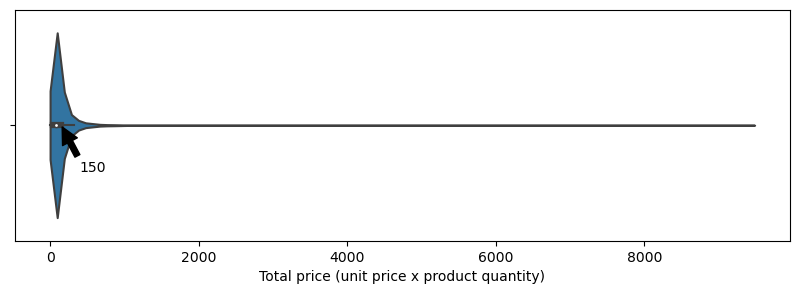

In [10]:
byOrder = df[['Order Id','Total price (unit price x product quantity)']].groupby('Order Id').sum()

plt.figure(figsize=(10, 3))
plt.annotate('150', xy=(150, 0), xytext=(400, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
sns.violinplot(x=byOrder['Total price (unit price x product quantity)'], cut = 0);

When these outliers are ignored, we can have a better focus on the average orders
Non-standard orders could be studied separately.

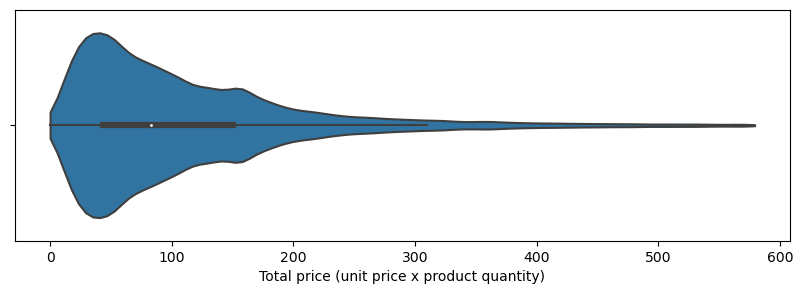

In [11]:
byOrder_no_outlier = byOrder[(np.abs(stats.zscore(byOrder)) < 3).all(axis=1)]
plt.figure(figsize=(10, 3))
sns.violinplot(x=byOrder_no_outlier['Total price (unit price x product quantity)'], cut = 0);

In [28]:
CentralTendacy = {}
CentralTendacy['Mean'] = byOrder_no_outlier['Total price (unit price x product quantity)'].mean()
CentralTendacy['Median'] = byOrder_no_outlier['Total price (unit price x product quantity)'].median()
CentralTendacy['Mode'] = byOrder_no_outlier['Total price (unit price x product quantity)'].mode()[0]

# CentralTendacy

{'Mean': 110.418420263593, 'Median': 82.56, 'Mode': 1.0}

Here are the indicators with the value adjusted to the "average" commands

In [12]:
fig = go.FigureWidget()

font_size = 65

fig.add_trace(go.Indicator(
    mode = "number",
    value = byOrder_no_outlier['Total price (unit price x product quantity)'].sum(),
    number_font_size = font_size,
    title = {"text": "Adjusted Total Sales"},
    domain = {'x': [0, 1/3], 'y': [0, 1]},))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(byOrder_no_outlier['Total price (unit price x product quantity)']),
    number_font_size = font_size,
    title = {"text": "Adjusted Total N. Order"},
    domain = {'x': [1/3, 2/3], 'y': [0, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = byOrder_no_outlier['Total price (unit price x product quantity)'].sum()/len(byOrder_no_outlier['Total price (unit price x product quantity)']),
    number_font_size = font_size,
    title = {"text": "Adjusted Average Order Value"},
    domain = {'x': [2/3, 1], 'y': [0, 1]}))

fig.update_layout(
    autosize=False,
    width=1000,
    height=150,
)

fig.show()

**How to increase AOV in general? It would be possible here to set up a free delivery offer, or a free product for a higher basket amount: a value of 150 for example**

When looking at the distribution of the average value per order, 2 categories represent the entire value: wine and spirits.
Evenly distributed 49.4% for spirits, 47.8% for wine, i.e. almost 50-50.

This is partly explained by the composition of the orders, a spirit is ordered 4 times out of 5 and wine in the same proportions

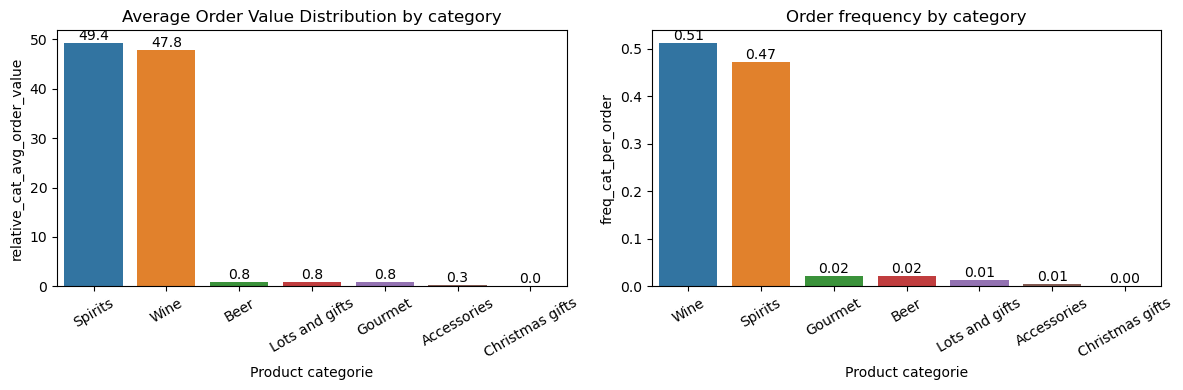

In [25]:
byCategory = df.groupby('Product categorie').agg({'Order Id' : ['nunique'],
                                                  'Total price (unit price x product quantity)' : ['sum']})

byCategory['freq_cat_per_order'] = byCategory['Order Id']/n_order
byCategory['cat_avg_order_value'] = byCategory['Total price (unit price x product quantity)']/n_order
byCategory['relative_cat_avg_order_value'] = 100*byCategory['cat_avg_order_value']/avg_order_value

plt.figure(figsize=(12, 4))
plt.subplot(121)
ax = sns.barplot(data = byCategory, x= byCategory.index, y='relative_cat_avg_order_value', order=byCategory.sort_values(by=['relative_cat_avg_order_value'], ascending=False).index);
ax.title.set_text("Average Order Value Distribution by category")
plt.xticks(rotation=30)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.subplot(122)
ax = sns.barplot(data = byCategory, x= byCategory.index, y='freq_cat_per_order', order=byCategory.sort_values(by=['freq_cat_per_order'], ascending=False).index);
ax.title.set_text("Order frequency by category")
plt.xticks(rotation=30)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.tight_layout()

By analyzing more finely, by taking a look at the subcategories, we can see that red wine is our main source of sales.
Indeed, one out of two orders includes wine and represents 28% of the average value.

**How to increase AOV? We know here that each order concerns either wine or a spirit but next to very few Gourmet, accessories...
A recommendation system proposing to complete the basket with Gourmet corresponding to the alcohol or the accessory allowing to open, present the bottle, glasses...**

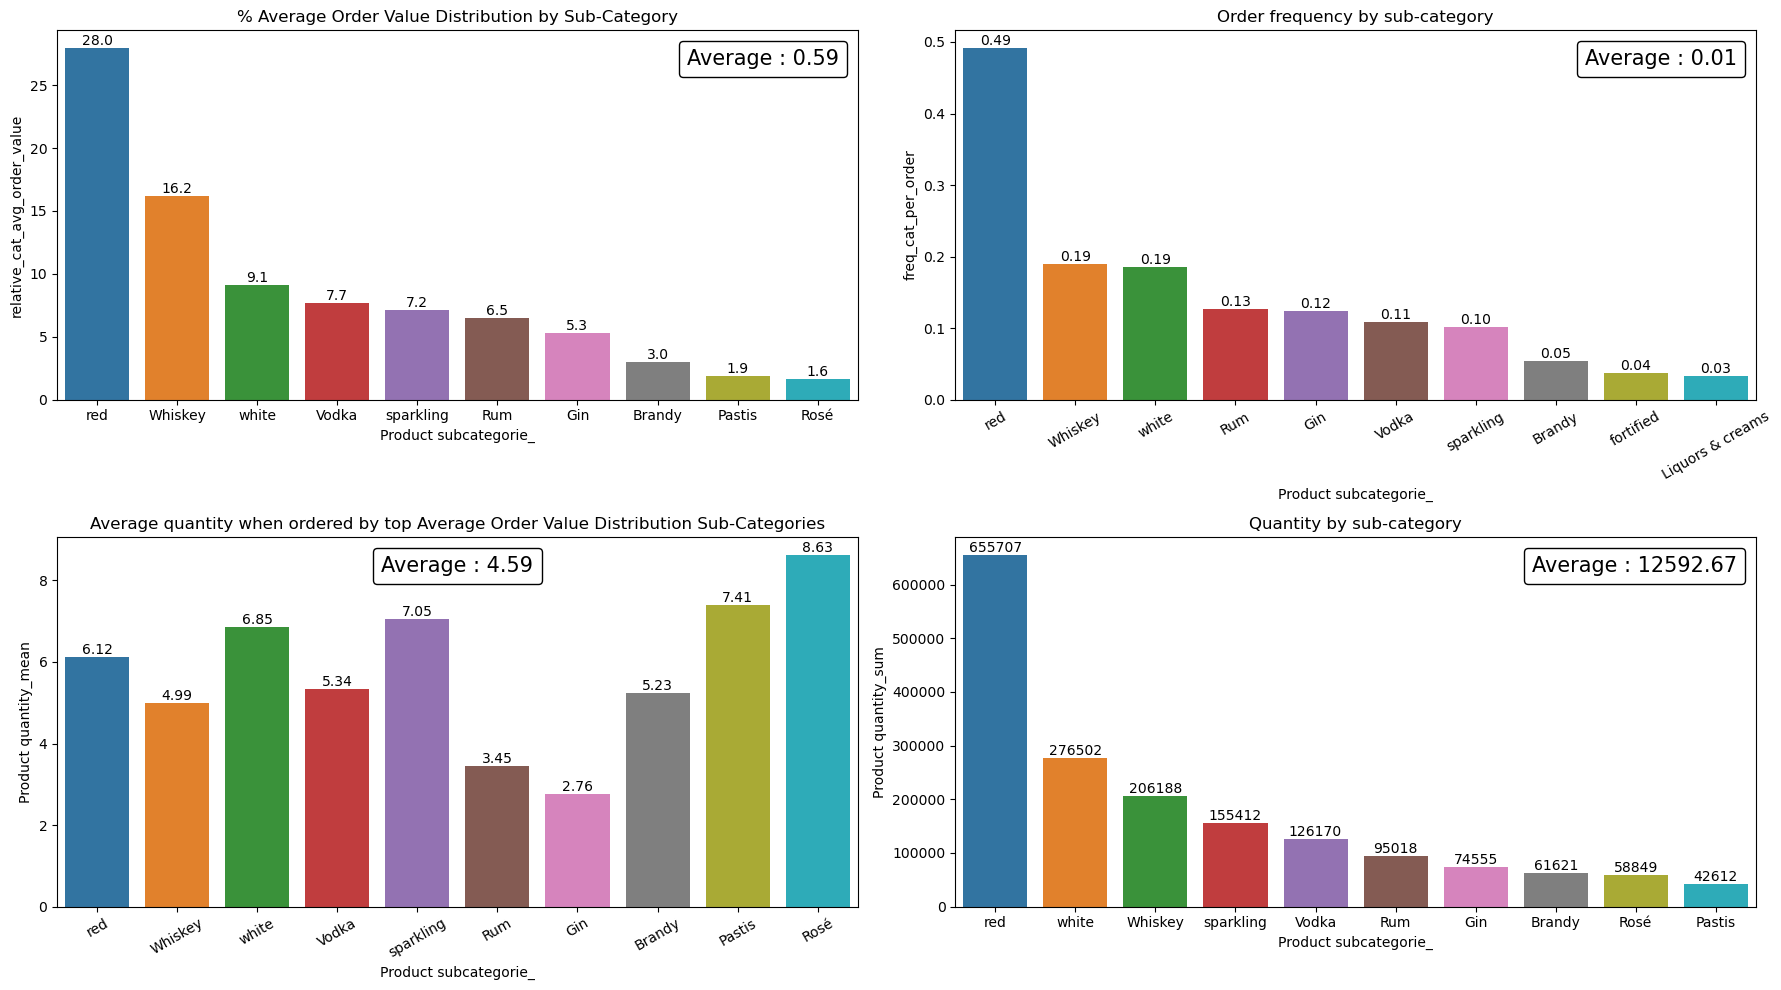

In [32]:
bySubCategory = df.groupby('Product subcategorie', as_index=False).agg({'Order Id' : ['count'],
                                                                        'Product quantity' : ['sum','mean'],
                                                                        'Total price (unit price x product quantity)' : ['sum']})

bySubCategory.columns = ['_'.join(col) for col in bySubCategory.columns]
bySubCategory['freq_cat_per_order'] = bySubCategory['Order Id_count']/n_order
# bySubCategory['quant_cat_per_order'] = bySubCategory['Product quantity_sum']/n_order
bySubCategory['cat_avg_order_value'] = bySubCategory['Total price (unit price x product quantity)_sum']/n_order
bySubCategory['relative_cat_avg_order_value'] = 100*bySubCategory['cat_avg_order_value']/avg_order_value

plt.figure(figsize=(18, 10))
plt.subplot(221)
column = 'relative_cat_avg_order_value'
ax = sns.barplot(data = bySubCategory.nlargest(10, column), x='Product subcategorie_', y=column);
at = AnchoredText(
    "Average : "+ str(bySubCategory[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("% Average Order Value Distribution by Sub-Category")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.subplot(222)
column = 'freq_cat_per_order'
ax = sns.barplot(data = bySubCategory.nlargest(10, column), x='Product subcategorie_', y=column);
at = AnchoredText(
    "Average : "+ str(bySubCategory[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("Order frequency by sub-category")
plt.xticks(rotation=30)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.subplot(223)
column = 'Product quantity_mean'
ax = sns.barplot(data = bySubCategory.nlargest(10, 'relative_cat_avg_order_value'), x='Product subcategorie_', y=column);
at = AnchoredText(
    "Average : "+ str(bySubCategory[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper center')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("Average quantity when ordered by top Average Order Value Distribution Sub-Categories")
plt.xticks(rotation=30)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.subplot(224)
column = 'Product quantity_sum'
ax = sns.barplot(data = bySubCategory.nlargest(10, column), x='Product subcategorie_', y=column);
at = AnchoredText(
    "Average : "+ str(bySubCategory[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("Quantity by sub-category")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

    
plt.tight_layout()

# Dependencies

When we look at our dependencies on our suppliers, we can see that our 10 largest suppliers in terms of value represent 2 thirds of our sales.
Among these suppliers, our 2 most important represent 1 third of our sales. These are suppliers n°92 and n°6.
They represent a significant part of our offer, indeed our supplier n°6 represents 12.3% of the referenced products, more than any other supplier.

When we compare these values to the average values, we can therefore say that we are heavily dependent on these suppliers n° 92 and n° 6, followed to a lesser extent by suppliers n° 124 and n° 86.
Then, we move towards a third group of major suppliers, each representing 5% of our average value.
But overall, with an average of 0.38% dependency per supplier, our dependancy on the rest of the suppliers is low.

In [15]:
n_unique_product = len(df['Product reference'].unique())

bySupplier = df.groupby('Supplier ID', as_index=False).agg({'Product reference':['nunique'],
                                         'Product quantity' : ['sum'],
                                         'Total price (unit price x product quantity)' : ['sum']})

bySupplier['Rel_Supplier_dependency_ByProduct'] = 100*bySupplier['Product reference']/n_unique_product
bySupplier['Rel_Supplier_Dependency_BySalesValue'] = 100*bySupplier['Total price (unit price x product quantity)']/income
bySupplier['Rel_Supplier_Dependency_ByQuantity'] = 100*bySupplier['Product quantity']/bySupplier['Product quantity'].sum()

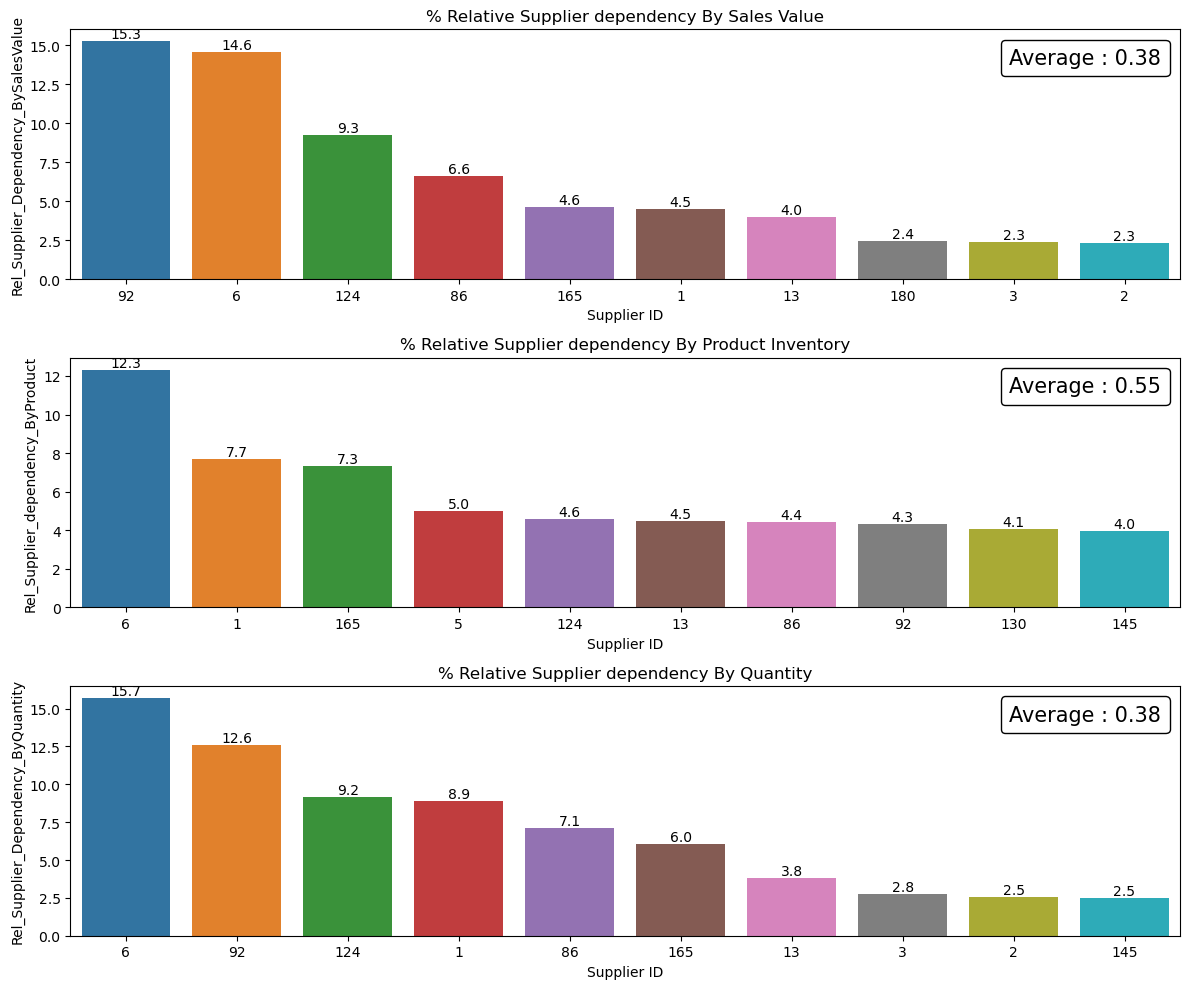

In [16]:
plt.figure(figsize=(12, 10))
    
plt.subplot(311)
column = 'Rel_Supplier_Dependency_BySalesValue'
local_data = bySupplier.nlargest(10, column)
ax = sns.barplot(data = local_data, x='Supplier ID', y=column, order=local_data.sort_values(by=[column], ascending=False)['Supplier ID']);
at = AnchoredText(
    "Average : "+ str(bySupplier[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("% Relative Supplier dependency By Sales Value")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.subplot(312)
column = 'Rel_Supplier_dependency_ByProduct'
local_data = bySupplier.nlargest(10, column)
ax = sns.barplot(data = local_data, x='Supplier ID', y=column, order=local_data.sort_values(by=[column], ascending=False)['Supplier ID']);
at = AnchoredText(
    "Average : "+ str(bySupplier[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("% Relative Supplier dependency By Product Inventory")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.subplot(313)
column = 'Rel_Supplier_Dependency_ByQuantity'
local_data = bySupplier.nlargest(10, column)
ax = sns.barplot(data = local_data, x='Supplier ID', y=column, order=local_data.sort_values(by=[column], ascending=False)['Supplier ID']);
at = AnchoredText(
    "Average : "+ str(bySupplier[column].mean().round(2)), prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
ax.title.set_text("% Relative Supplier dependency By Quantity")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.tight_layout()

## Geographic dependency

The map above allows us to highlight our supply dependencies by country. With 74% of our sales value, Spain is the country to follow to ensure our supply chain.

In [17]:
n_unique_product = len(df['Product reference'].unique())

byCountry = df.groupby('Supplier country', as_index=False).agg({'Product reference':['nunique'],
                                         'Product quantity' : ['sum'],
                                         'Total price (unit price x product quantity)' : ['sum']})

byCountry['Rel_Country_dependency_ByProduct'] = 100*byCountry['Product reference']/n_unique_product
byCountry['Rel_Country_Dependency_BySalesValue'] = 100*byCountry['Total price (unit price x product quantity)']/income
byCountry['Rel_Country_Dependency_ByQuantity'] = 100*byCountry['Product quantity']/bySupplier['Product quantity'].sum()

In [18]:
data = dict(
type = 'choropleth',
colorscale = 'OrRd',
locations = byCountry['Supplier country'],
locationmode = "country names",
z = byCountry['Rel_Country_Dependency_BySalesValue'],
text = byCountry['Supplier country'],
colorbar = {'title' : 'Rel_Country_Dependency_BySalesValue'},
)

layout = dict(title = 'Country dependency by sales values (%)',geo = dict(showframe = False,projection = {'type':'natural earth'}, scope='europe',)
)

chmap = go.FigureWidget(data = [data],layout = layout)

chmap.update_layout(
    autosize=False,
    width=1000,
    height=500,
)
# iplot(chmap)
chmap.show()